# Libs and pre-definitions

In [1]:
DATA_PATH = r'/home/luis-felipe/Uncertainty_Estimation/data'
#CORRUPTED_DATA_PATH = os.path.join(DATA_PATH,'corrupted')

PATH_MODELS = r'/home/luis-felipe/Uncertainty_Estimation/torch_models'
PATH_trainer = r'/home/luis-felipe/Uncertainty_Estimation/torch_models/trainer'

### Bibliotecas padrões python e utils pytorch

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Lambda, Compose, Normalize
from collections import defaultdict
from torch.utils.data import random_split
import copy
import os

In [3]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

True


### Bibliotecas desenvolvidas

https://github.com/lfpc/Uncertainty_Estimation

In [4]:
import NN_models as models
from NN_models import vgg
from NN_models import wide_resnet
import NN_utils as utils
import NN_utils.train_and_eval as TE
import cifar_data

# Train classifier

In [12]:
loss_criterion = nn.NLLLoss()
    
    
#risk_dict = {'selective_risk_mcp':  lambda x,label: unc_comp.selective_risk(x,label,unc_type = unc.MCP_unc)}

In [15]:
MODEL_ARC = 'VGG_16'
DATA = 'Cifar100'

data = cifar_data.__dict__[DATA](data_dir = DATA_PATH)
num_classes = data.n_classes
model_class = models.__dict__[MODEL_ARC]

model_path = os.path.join(PATH_MODELS,MODEL_ARC)
weights_path = os.path.join(model_path,DATA)

Files already downloaded and verified
Files already downloaded and verified


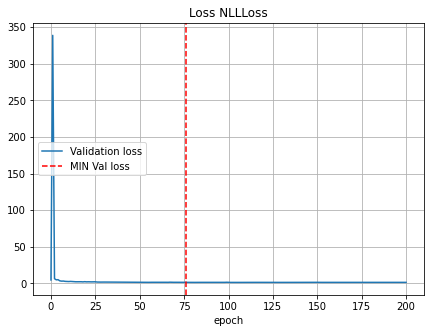

Acc_val (max): 71.57 (71.63) | Progress:: 100%|#########9| 199/200 [57:32<00:17, 17.24s/it]

Conjunto de treinamento: acc =  99.738
Conjunto de teste: acc =  71.36
Conjunto de teste: MAX acc =  71.63


In [17]:
for ens in range(4,8):
    name = MODEL_ARC+'_'+str(num_classes)+'_ensemble_'+str(ens)
    model = model_class(num_classes = data.n_classes,softmax = 'log',name = name).to(dev)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1,momentum = 0.9,weight_decay = 5e-4,nesterov = True)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 25, gamma=0.5)

    model_trainer = TE.Trainer(model,optimizer,loss_criterion, None,data.test_dataloader,lr_scheduler = scheduler)
    model_trainer.fit(data.train_dataloader,200, live_plot = True,save_checkpoint = True,PATH = weights_path)
    
    model.eval()
    acc = TE.model_acc(model,data.train_dataloader)
    print('Conjunto de treinamento: acc = ', acc)
    acc = TE.model_acc(model,data.test_dataloader)
    print('Conjunto de teste: acc = ', acc)
    print('Conjunto de teste: MAX acc = ', max(model_trainer.hist_val.acc_list))

In [18]:
DATA = 'Cifar10'

data = cifar_data.__dict__[DATA](data_dir = DATA_PATH)
num_classes = data.n_classes
weights_path = os.path.join(model_path,DATA)

Files already downloaded and verified
Files already downloaded and verified


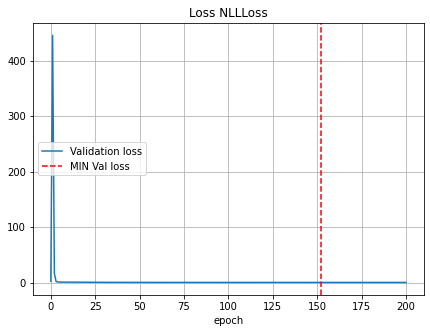

Acc_val (max): 93.49 (93.73) | Progress:: 100%|#########9| 199/200 [57:38<00:17, 17.28s/it]

Conjunto de treinamento: acc =  99.984
Conjunto de teste: acc =  93.68
Conjunto de teste: MAX acc =  93.73


In [19]:
for ens in range(4,8):
    name = MODEL_ARC+'_'+str(num_classes)+'_ensemble_'+str(ens)
    model = model_class(num_classes = data.n_classes,softmax = 'log',name = name).to(dev)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1,momentum = 0.9,weight_decay = 5e-4,nesterov = True)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 25, gamma=0.5)

    model_trainer = TE.Trainer(model,optimizer,loss_criterion, None,data.test_dataloader,lr_scheduler = scheduler)
    model_trainer.fit(data.train_dataloader,200, live_plot = True,save_checkpoint = True,PATH = weights_path)
    
    model.eval()
    acc = TE.model_acc(model,data.train_dataloader)
    print('Conjunto de treinamento: acc = ', acc)
    acc = TE.model_acc(model,data.test_dataloader)
    print('Conjunto de teste: acc = ', acc)
    print('Conjunto de teste: MAX acc = ', max(model_trainer.hist_val.acc_list))